In [18]:
import numpy as np
import pandas as pd
import statsmodels.formula.api as smf
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [19]:
ng_score = pd.read_csv('ng_scores.csv', dtype={'uid': 'str', 'group':'category'})
ng_score = ng_score.drop('Unnamed: 0', axis=1)
ng_score = ng_score[~ng_score.isin([np.nan, np.inf, -np.inf]).any(axis=1)]
ng_score.describe()


,aa_ng,as_ng,dd_ng,in_ng,ii_ng,ng
count,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000
mean,-0.089583,0.061979,-0.525967,-0.029762,-0.456771,-0.038031
std,0.696326,0.485068,1.156506,0.283777,0.960015,0.197238
min,-3.000000,-1.000000,-4.000000,-1.000000,-3.000000,-0.609000
25%,-0.062500,0.000000,-0.750000,-0.035714,-1.000000,-0.156500
50%,0.000000,0.000000,-0.100000,0.000000,-0.333333,-0.021500
75%,0.270833,0.425000,0.071429,0.166667,0.270833,0.100000
max,0.750000,1.000000,0.750000,0.285714,0.666667,0.292000


In [20]:
times = pd.read_csv('times.csv', dtype={'uid': 'str', 'group':'category'})
times.drop('Unnamed: 0', axis=1, inplace=True)
times.describe()

,pre_duration_aa,pre_duration_as,pre_duration_dd,pre_duration_in,pre_duration_ii,post_duration_aa,post_duration_as,post_duration_dd,post_duration_in,post_duration_ii,pre_total_duration,post_total_duration
count,37.000000,37.000000,37.000000,37.000000,37.000000,37.000000,37.000000,37.00000,37.000000,37.000000,37.000000,37.000000
mean,504.675676,440.216216,389.486486,372.459459,304.189189,407.135135,338.081081,324.27027,375.324324,329.405405,2011.027027,1774.216216
std,131.127600,161.480672,154.507932,143.269675,129.842177,114.813414,133.222116,152.23185,135.354689,161.701450,531.588891,543.936788
min,146.000000,84.000000,22.000000,27.000000,0.000000,176.000000,0.000000,0.00000,0.000000,0.000000,349.000000,314.000000
25%,493.000000,316.000000,264.000000,303.000000,251.000000,315.000000,269.000000,266.00000,305.000000,251.000000,1739.000000,1432.000000
50%,559.000000,476.000000,426.000000,392.000000,309.000000,401.000000,333.000000,303.00000,381.000000,335.000000,2192.000000,1793.000000
75%,600.000000,587.000000,522.000000,469.000000,394.000000,505.000000,431.000000,417.00000,455.000000,451.000000,2353.000000,2282.000000
max,610.000000,601.000000,598.000000,563.000000,599.000000,595.000000,583.000000,594.00000,628.000000,600.000000,2676.000000,2653.000000


In [21]:
from sklearn.preprocessing import StandardScaler
times_no_uid = times.iloc[:,2:]
scaler = StandardScaler()
scaler2 = StandardScaler()
scaler.fit(times_no_uid)
scaler2.fit(times_no_uid[['post_total_duration']])
scaled_times = scaler.transform(times_no_uid)
scaled_times_df = pd.DataFrame(data=scaled_times, columns=times_no_uid.columns.values)
scaled_times_df = pd.concat([times.iloc[:,0:2], scaled_times_df], axis=1)
scaled_times_df.describe()

,pre_duration_aa,pre_duration_as,pre_duration_dd,pre_duration_in,pre_duration_ii,post_duration_aa,post_duration_as,post_duration_dd,post_duration_in,post_duration_ii,pre_total_duration,post_total_duration
count,3.700000e+01,3.700000e+01,3.700000e+01,3.700000e+01,3.700000e+01,3.700000e+01,3.700000e+01,3.700000e+01,3.700000e+01,3.700000e+01,3.700000e+01,3.700000e+01
mean,3.300663e-17,1.260253e-16,-1.740350e-16,-1.545310e-16,1.905383e-16,-2.160434e-16,-9.601929e-17,9.901989e-17,9.001808e-18,-5.701145e-17,-1.260253e-16,-9.751959e-17
std,1.013794e+00,1.013794e+00,1.013794e+00,1.013794e+00,1.013794e+00,1.013794e+00,1.013794e+00,1.013794e+00,1.013794e+00,1.013794e+00,1.013794e+00,1.013794e+00
min,-2.773048e+00,-2.236365e+00,-2.411239e+00,-2.444513e+00,-2.375076e+00,-2.040906e+00,-2.572730e+00,-2.159490e+00,-2.811144e+00,-2.065220e+00,-3.169654e+00,-2.721563e+00
25%,-9.026877e-02,-7.798433e-01,-8.233714e-01,-4.915036e-01,-4.152955e-01,-8.135463e-01,-5.256933e-01,-3.880531e-01,-5.267225e-01,-4.915658e-01,-5.187830e-01,-6.378253e-01
50%,4.200005e-01,2.246546e-01,2.395810e-01,1.382713e-01,3.756229e-02,-5.417278e-02,-3.866601e-02,-1.416502e-01,4.251027e-02,3.507554e-02,3.451338e-01,3.500937e-02
75%,7.369860e-01,9.215250e-01,8.694788e-01,6.831327e-01,7.012332e-01,8.641393e-01,7.070945e-01,6.175371e-01,5.967632e-01,7.623422e-01,6.521770e-01,9.464115e-01
max,8.142995e-01,1.009419e+00,1.368148e+00,1.348288e+00,2.301851e+00,1.658833e+00,1.863784e+00,1.796275e+00,1.892517e+00,1.696504e+00,1.268171e+00,1.637884e+00


In [22]:
ng_no_uid = ng_score.iloc[:,2:]
scaler = StandardScaler()
scaler.fit(ng_no_uid)
scaled_ng = scaler.transform(ng_no_uid)
scaled_ng_df = pd.DataFrame(data=scaled_ng, columns=ng_no_uid.columns.values)
scaled_ng_df = pd.concat([ng_score.iloc[:,0:2], scaled_ng_df], axis=1)
scaled_ng_df.describe()

,aa_ng,as_ng,dd_ng,in_ng,ii_ng,ng
count,3.200000e+01,3.200000e+01,3.200000e+01,3.200000e+01,3.200000e+01,3.200000e+01
mean,8.500145e-17,-1.387779e-17,-3.469447e-17,1.214306e-17,-3.469447e-17,1.387779e-17
std,1.016001e+00,1.016001e+00,1.016001e+00,1.016001e+00,1.016001e+00,1.016001e+00
min,-4.246554e+00,-2.224373e+00,-3.051968e+00,-3.473727e+00,-2.691546e+00,-2.941142e+00
25%,3.951696e-02,-1.298187e-01,-1.968147e-01,-2.131121e-02,-5.749093e-01,-6.102496e-01
50%,1.307100e-01,-1.298187e-01,3.742160e-01,1.065560e-01,1.306361e-01,8.515485e-02
75%,5.258796e-01,7.603667e-01,5.248175e-01,7.032699e-01,7.700367e-01,7.110188e-01
max,1.225026e+00,1.964735e+00,1.120948e+00,1.129494e+00,1.188954e+00,1.700038e+00


### create a dataframe about the total score and total time and a dataframe for all data

In [23]:
total_data = pd.merge(ng_score[['uid', 'group', 'ng']], times[['uid', 'group', 'post_total_duration']], on=['uid','group'], how='left')

total_data_scaled = pd.merge(ng_score[['uid', 'group', 'ng']], scaled_times_df[['uid', 'group', 'post_total_duration']], on=['uid','group'], how='left')

fdata = pd.merge(ng_score, times, on=['uid','group'], how='left')

fdata_scaled = pd.merge(ng_score, scaled_times_df, on=['uid','group'], how='left')


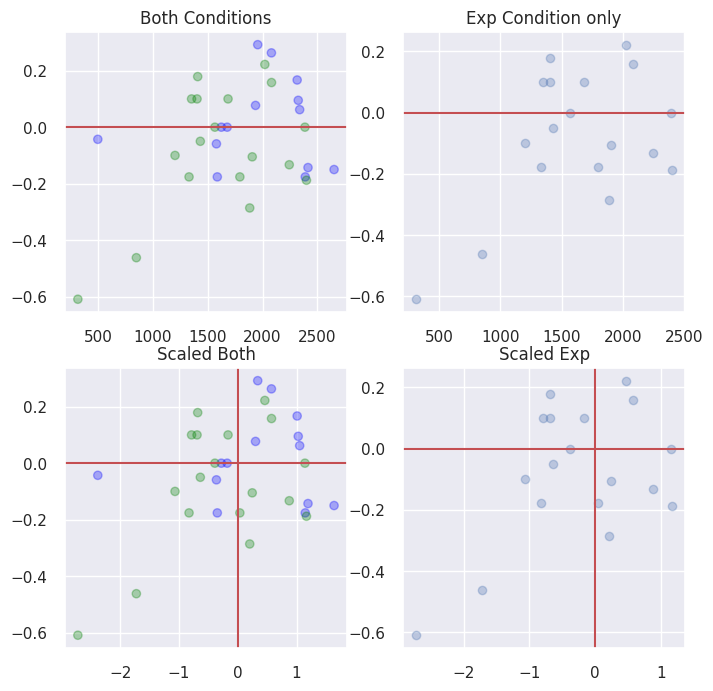

In [24]:
figure, axis = plt.subplots(2, 2, figsize=(8,8))
axis[0][0].scatter(total_data[['post_total_duration']], total_data[['ng']], alpha=0.3, 
                   c=total_data['group'].map({'exp':'green', 'cont':'blue'}))
axis[0][0].set_title("Both Conditions")
axis[0][0].axhline(y = 0, color = 'r', linestyle = '-')

# plt.scatter(total_data.loc[total_data['group']=='exp', ['post_total_duration']], 
            # total_data.loc[total_data['group']=='exp', ['ng']]
# )

axis[0][1].scatter(total_data.loc[total_data['group']=='exp', ['post_total_duration']], 
            total_data.loc[total_data['group']=='exp', ['ng']], alpha=0.3)
axis[0][1].set_title("Exp Condition only")
axis[0][1].axhline(y = 0, color = 'r', linestyle = '-')


axis[1][0].scatter(total_data_scaled[['post_total_duration']], total_data_scaled[['ng']], alpha=0.3, 
                   c=total_data['group'].map({'exp':'green', 'cont':'blue'}))
axis[1][0].set_title("Scaled Both")
axis[1][0].axhline(y = 0, color = 'r', linestyle = '-')
axis[1][0].axvline(x = 0, color = 'r', linestyle = '-')


axis[1][1].scatter(total_data_scaled.loc[total_data_scaled['group']=='exp', ['post_total_duration']], 
            total_data_scaled.loc[total_data_scaled['group']=='exp', ['ng']], alpha=0.3)
axis[1][1].set_title("Scaled Exp")
axis[1][1].axhline(y = 0, color = 'r', linestyle = '-')
axis[1][1].axvline(x = 0, color = 'r', linestyle = '-')


plt.show()


#### AA

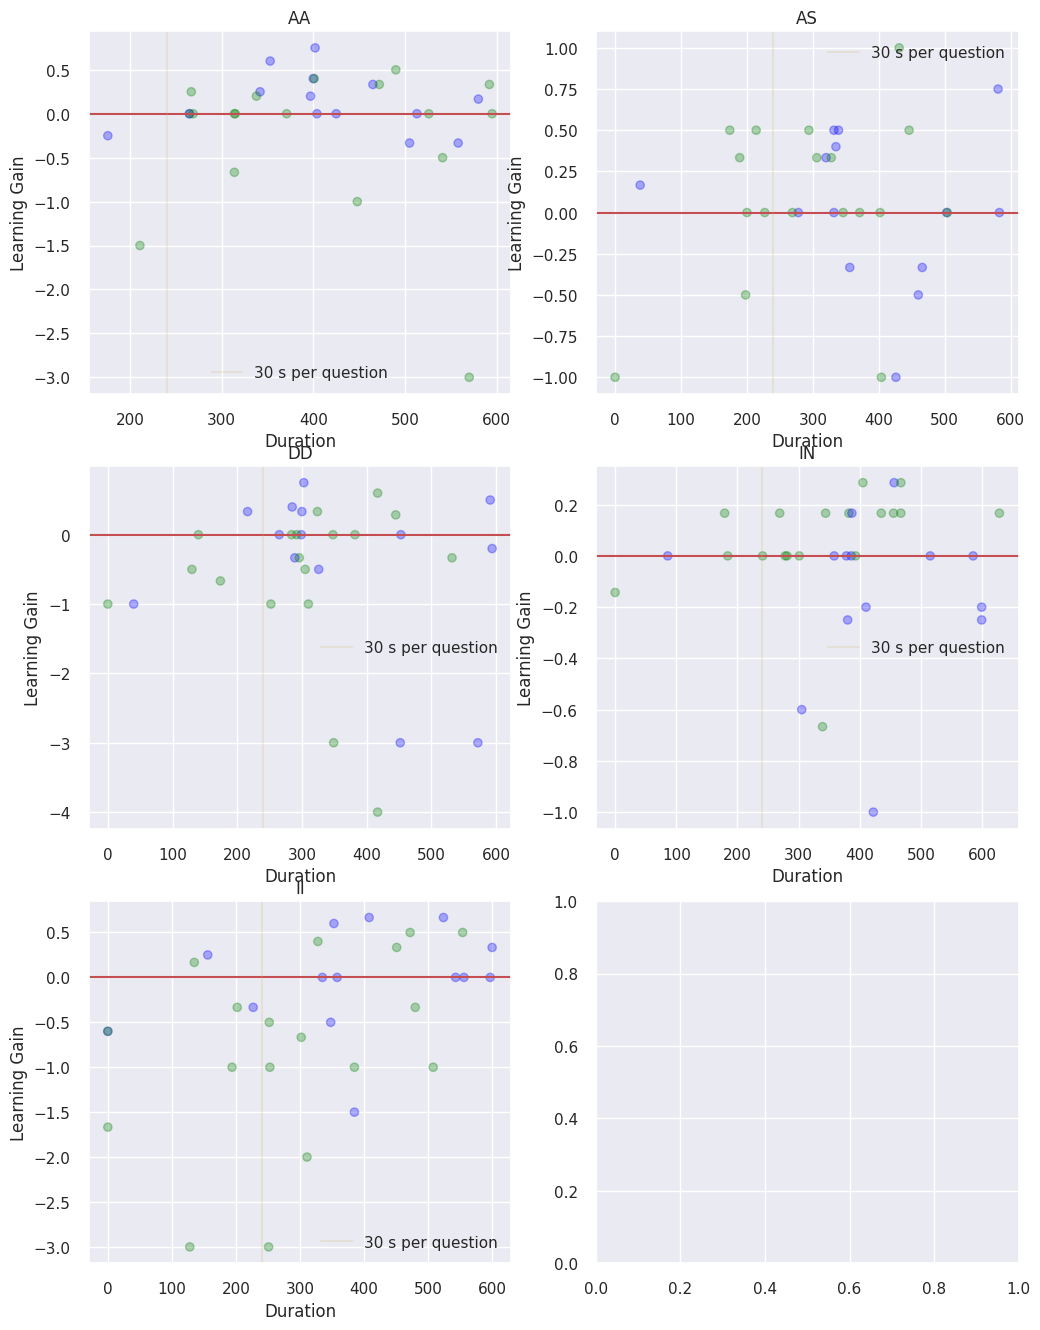

In [25]:
figure, axis = plt.subplots(3, 2, figsize=(12,16))

# AA
axis[0][0].scatter(fdata[['post_duration_aa']], fdata[['aa_ng']], alpha=0.3, 
                   c=fdata['group'].map({'exp':'green', 'cont':'blue'}))
axis[0][0].set_xlabel('Duration')
axis[0][0].set_ylabel('Learning Gain')
axis[0][0].set_title("AA")
axis[0][0].axhline(y = 0, color = 'r', linestyle = '-')
axis[0][0].axvline(x = 240, color = 'y', linestyle = '-', alpha=0.2, label='30 s per question')
axis[0][0].legend()

## AS
axis[0][1].scatter(fdata[['post_duration_as']], fdata[['as_ng']], alpha=0.3, 
                   c=fdata['group'].map({'exp':'green', 'cont':'blue'}))
axis[0][1].set_xlabel('Duration')
axis[0][1].set_ylabel('Learning Gain')
axis[0][1].set_title("AS")
axis[0][1].axhline(y = 0, color = 'r', linestyle = '-')
axis[0][1].axvline(x = 240, color = 'y', linestyle = '-', alpha=0.2, label='30 s per question')
axis[0][1].legend()

## DD
axis[1][0].scatter(fdata[['post_duration_dd']], fdata[['dd_ng']], alpha=0.3, 
                   c=fdata['group'].map({'exp':'green', 'cont':'blue'}))
axis[1][0].set_xlabel('Duration')
axis[1][0].set_ylabel('Learning Gain')
axis[1][0].set_title("DD")
axis[1][0].axhline(y = 0, color = 'r', linestyle = '-')
axis[1][0].axvline(x = 240, color = 'y', linestyle = '-', alpha=0.2, label='30 s per question')
axis[1][0].legend()

## IN
axis[1][1].scatter(fdata[['post_duration_in']], fdata[['in_ng']], alpha=0.3, 
                   c=fdata['group'].map({'exp':'green', 'cont':'blue'}))
axis[1][1].set_xlabel('Duration')
axis[1][1].set_ylabel('Learning Gain')
axis[1][1].set_title("IN")
axis[1][1].axhline(y = 0, color = 'r', linestyle = '-')
axis[1][1].axvline(x = 240, color = 'y', linestyle = '-', alpha=0.2, label='30 s per question')
axis[1][1].legend()


## II
axis[2][0].scatter(fdata[['post_duration_ii']], fdata[['ii_ng']], alpha=0.3, 
                   c=fdata['group'].map({'exp':'green', 'cont':'blue'}))
axis[2][0].set_xlabel('Duration')
axis[2][0].set_ylabel('Learning Gain')
axis[2][0].set_title("II")
axis[2][0].axhline(y = 0, color = 'r', linestyle = '-')
axis[2][0].axvline(x = 240, color = 'y', linestyle = '-', alpha=0.2, label='30 s per question')
axis[2][0].legend()

# plt.legend()
plt.show()


compare those with ng >= 0

/tmp/ipykernel_35868/3771550102.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.clustermap(fdata.corr())


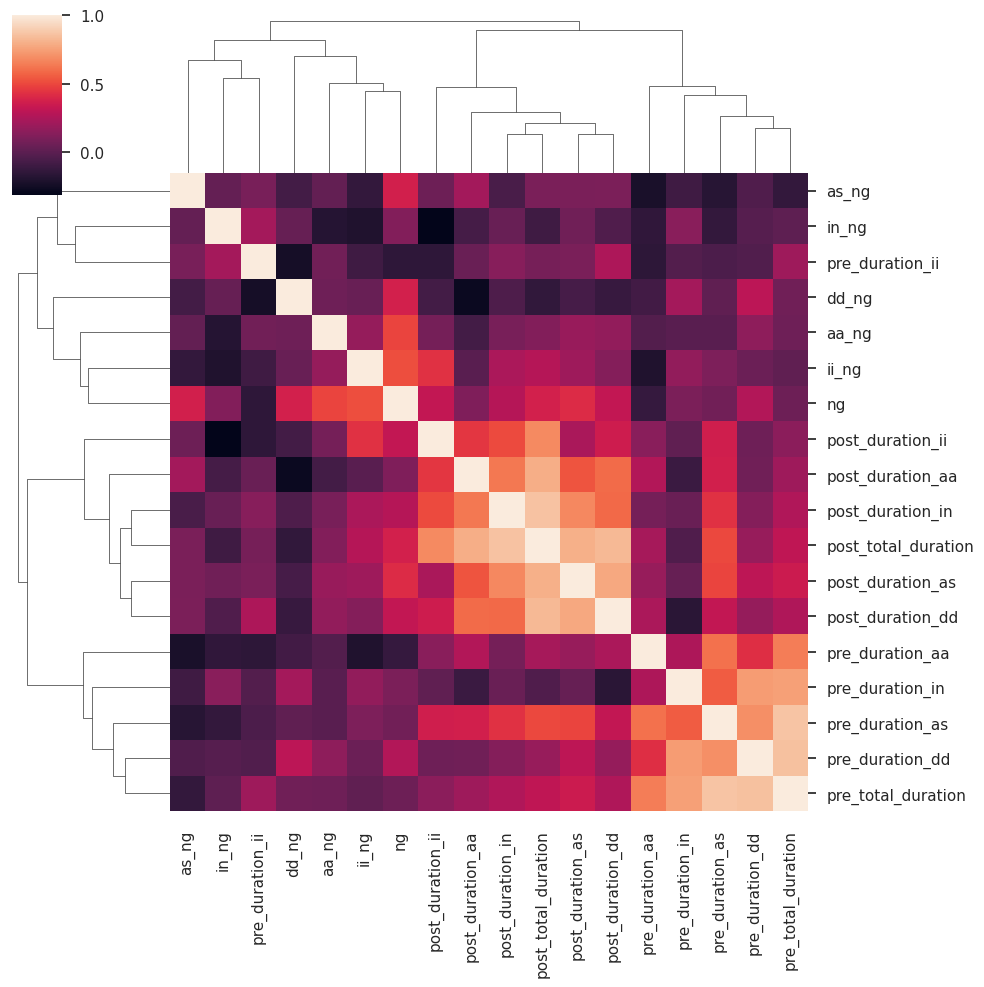

In [26]:
sns.clustermap(fdata.corr())

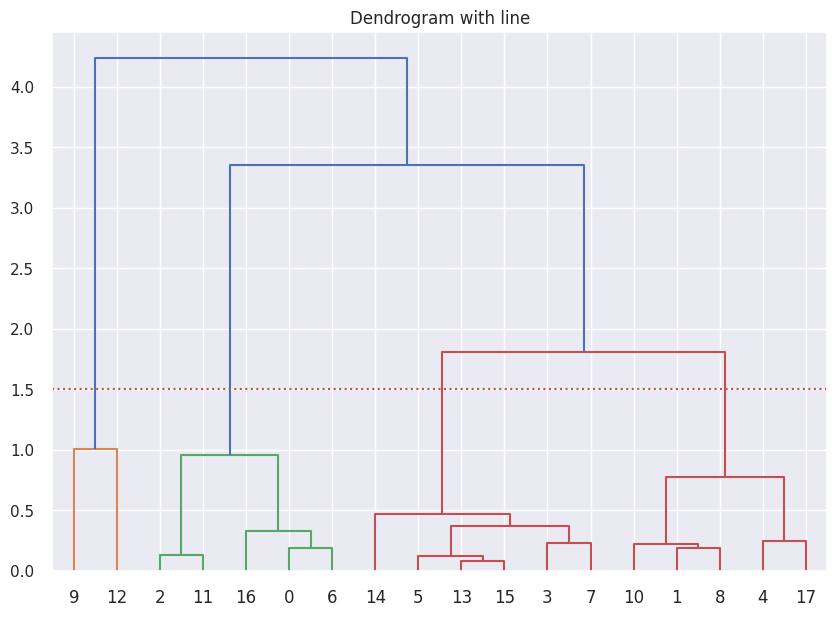

In [27]:
import scipy.cluster.hierarchy as shc

plt.figure(figsize=(10, 7))
plt.title("Dendrogram with line")

exp = fdata_scaled.loc[fdata_scaled['group']=='exp', :]
selected_data = exp.loc[:, ['post_total_duration', 'ng']]
clusters = shc.linkage(selected_data, 
            method='ward', 
            metric="euclidean")
shc.dendrogram(Z=clusters)

plt.axhline(y=1.5, color = 'r', linestyle = ':')
plt.show()


In [28]:
from sklearn.cluster import AgglomerativeClustering

clustering_model = AgglomerativeClustering(n_clusters=4, affinity='euclidean', linkage='ward')
clustering_model.fit(selected_data)
clustering_model.labels_

array([2, 1, 2, 3, 1, 3, 2, 3, 1, 0, 1, 2, 0, 3, 3, 3, 2, 1])

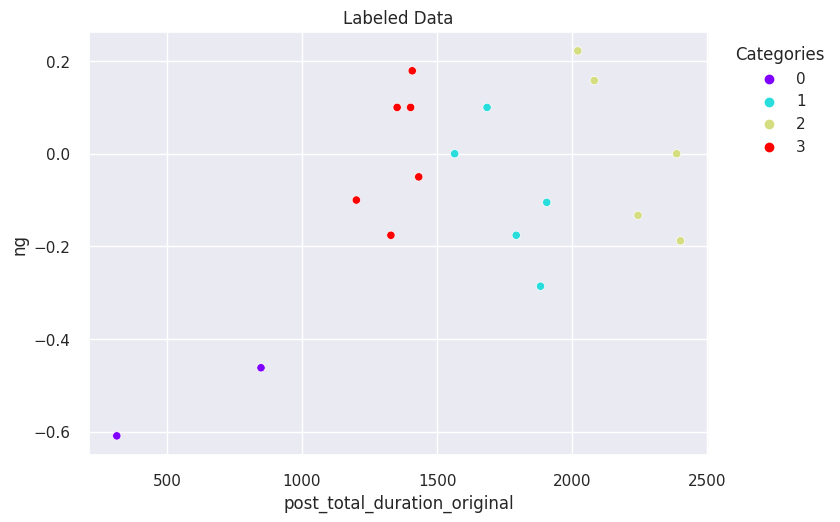

In [30]:
data_labels = clustering_model.labels_
# selected_data2 = pd.merge(selected_data, fdata['post_total_duration'])
selected_data2 = selected_data.copy()
selected_data['post_total_duration_original'] = fdata['post_total_duration']
sns.scatterplot(x='post_total_duration_original', 
                y='ng', 
                data=selected_data, 
                hue=data_labels,
                palette="rainbow").set_title('Labeled Data')
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', title='Categories')


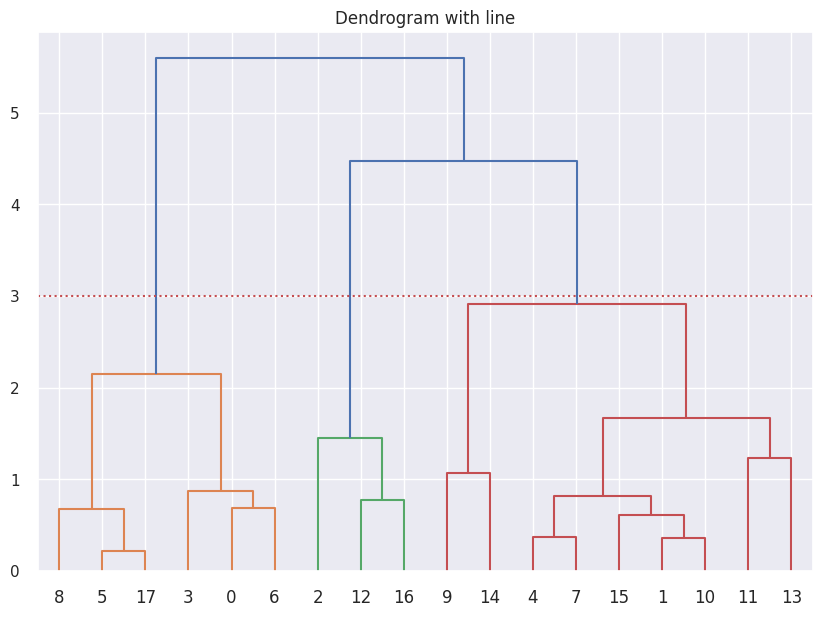

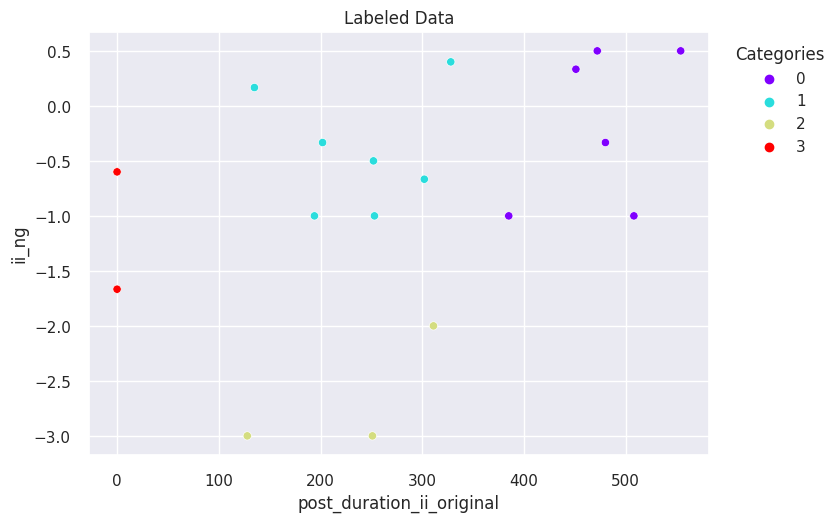

In [31]:
plt.figure(figsize=(10, 7))
plt.title("Dendrogram with line")

exp = fdata_scaled.loc[fdata_scaled['group']=='exp', :]
selected_data = exp.loc[:, ['post_duration_ii', 'ii_ng']]
clusters = shc.linkage(selected_data, 
            method='ward', 
            metric="euclidean")
shc.dendrogram(Z=clusters)

plt.axhline(y=3, color = 'r', linestyle = ':')
plt.show()

clustering_model = AgglomerativeClustering(n_clusters=4, affinity='euclidean', linkage='ward')
clustering_model.fit(selected_data)
clustering_model.labels_


data_labels = clustering_model.labels_
selected_data['post_duration_ii_original'] = fdata['post_duration_ii']
sns.scatterplot(x='post_duration_ii_original', 
                y='ii_ng', 
                data=selected_data, 
                hue=data_labels,
                palette="rainbow").set_title('Labeled Data')
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', title='Categories')


#### Kmeans

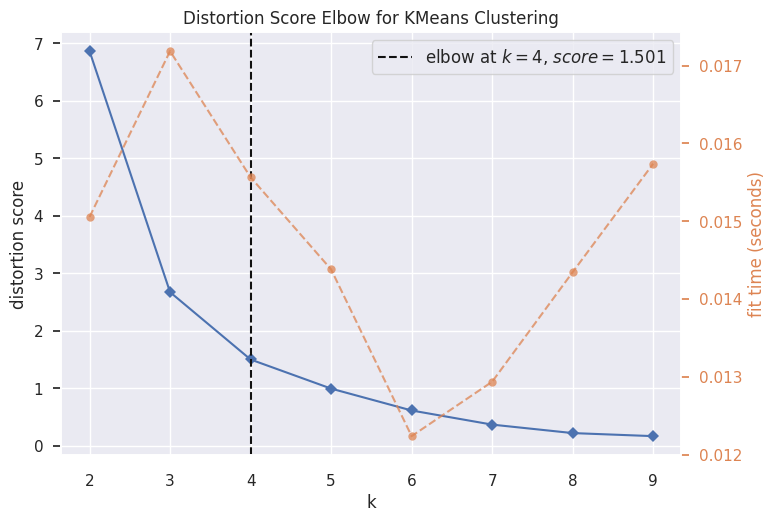

<AxesSubplot: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [54]:
from yellowbrick.cluster import SilhouetteVisualizer
from yellowbrick.cluster import KElbowVisualizer
from sklearn.cluster import KMeans

exp = fdata_scaled.loc[fdata_scaled['group']=='exp', :]
selected_data = exp.loc[:, ['post_total_duration', 'ng']]

km = KMeans(random_state=42)
visualizer = KElbowVisualizer(km, k=(2,10), metric='distortion')
 
visualizer.fit(selected_data[['post_total_duration', 'ng']])        # Fit the data to the visualizer
# visualizer.fit(data)        # Fit the data to the visualizer
visualizer.show()        # Finalize and render the figure

#### What about Pre Post

In [48]:
selected_data2.columns.values
selected_data2_noout = selected_data2.loc[selected_data2['ng']>=-0.2,:]
selected_data2_noout


,post_total_duration,ng,post_total_duration_original
1,1.142111,0.000,2387
3,0.573650,0.158,2082
4,-0.637825,-0.050,1432
8,-0.166282,0.100,1685
10,-0.786930,0.100,1352
13,1.168205,-0.188,2401
16,-0.829798,-0.176,1329
17,0.245620,-0.105,1906
21,0.035009,-0.176,1793
22,0.459958,0.222,2021


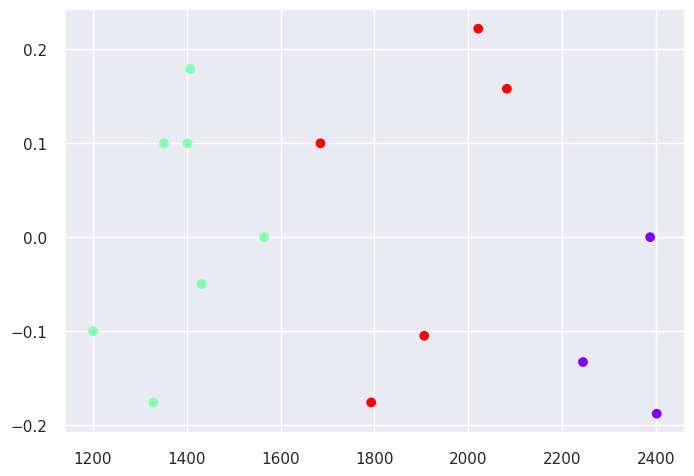

In [52]:
kmeans_4 = KMeans(3)
kmeans_4.fit(selected_data2_noout)

clusters_4 = selected_data2_noout.copy()
clusters_4['cluster_pred']=kmeans_4.labels_

plt.scatter(clusters_4['post_total_duration_original'], clusters_4['ng'], 
            c= clusters_4 ['cluster_pred'], cmap = 'rainbow')